<div class='bar_title'></div>

*Introduction to Data Science*

# Modeling (aka. Machine Learning)

Gunther Gust<br>
Chair of Enterprise AI

Winter Semester 24/25

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/d3.png?raw=1" style="width:20%; float:left;" />

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/ao_modeling.png" style="width:80%" />


# Content

## Building a machine learning pipeline

* Data Selection
* Model Training
* Model Evaluation
* Hyperparameter Tuning
* Data Cleaning
* Combining everything in a pipeline

Credits: Most of the material of this lecture is adopted from www.kaggle.com

## Scenario: Real estate price predictions


This lecture provides an overview of how machine learning models can be used for real problems. We will build models as well as a machine learning pipeline based on the following scenario:

Your cousin has made millions of dollars speculating on real estate. He's offered to become business partners with you because of your interest in data science. He'll supply the money, and you'll supply models that predict how much various houses are worth.

You ask your cousin how he's predicted real estate values in the past and he says it is just intuition. But more questioning reveals that he's identified price patterns from houses he has seen in the past, and he uses those patterns to make predictions for new houses he is considering.

Instead of using intuition to make good decision, we want to train a __machine learning model to predict the value of new houses__.

## Loading the Data
The first step in any machine learning project is to load and familiarize yourself with the data. To this end, we can use the pandas library from last week and load the dataset with the following commands:

In [1]:
import pandas as pd
import sklearn


In [2]:
melbourne_file_path = 'https://raw.githubusercontent.com/vhaus63/ids_data/refs/heads/main/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)

melbourne_data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13580 non-null  int64  
 1   Suburb         13580 non-null  object 
 2   Address        13580 non-null  object 
 3   Rooms          13580 non-null  int64  
 4   Type           13580 non-null  object 
 5   Price          13580 non-null  float64
 6   Method         13580 non-null  object 
 7   SellerG        13580 non-null  object 
 8   Date           13580 non-null  object 
 9   Distance       13580 non-null  float64
 10  Postcode       13580 non-null  float64
 11  Bedroom2       13580 non-null  float64
 12  Bathroom       13580 non-null  float64
 13  Car            13518 non-null  float64
 14  Landsize       13580 non-null  float64
 15  BuildingArea   7130 non-null   float64
 16  YearBuilt      8205 non-null   float64
 17  CouncilArea    12211 non-null  object 
 18  Lattit

## Removing Missing Values

For simplicity we remove rows with missing values for this example. Note that a missing value can sometimes be a valuable information.

In [4]:
print(melbourne_data.shape)
melbourne_data.dropna(axis=0, inplace=True)
print(melbourne_data.shape)

(13580, 22)
(6196, 22)


## Select data for modeling
On a first glimpse, we see that our dataset has too many variables to wrap our heads around. How can we pare down this overwhelming amount of data to something we can understand?

We'll start by picking a few variables using our intuition. To choose variables, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame:

In [5]:
melbourne_data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Selecting the prediction target

To train a predictive model using supervised machine learning techniques, we have to identify the target variable. In the problem at hand, we want to predict the house prices. This information is encoded in the column Price.

By convention, the target variable is called **y**.

In [6]:
y = melbourne_data['Price']

### Choosing "Features"
The columns that serve as input for our model (and are later used to make predictions) are called "features." Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).


In [7]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                        'YearBuilt', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [8]:
X = melbourne_data[melbourne_features]

## Quick EDA

Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows. Visually checking your data with these commands is an important part of a data scientist's job. You'll frequently find surprises in the dataset that deserve further inspection.

In [9]:
print(X.shape)
X.head()

(6196, 7)


,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941
6,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993
7,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954


In [10]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407,0.971079,1.00000,2.000000,3.00000,4.0000,8.00000
Bathroom,6196.0,1.576340,0.711362,1.00000,1.000000,1.00000,2.0000,8.00000
Landsize,6196.0,471.006940,897.449881,0.00000,152.000000,373.00000,628.0000,37000.00000
BuildingArea,6196.0,141.568645,90.834824,0.00000,91.000000,124.00000,170.0000,3112.00000
YearBuilt,6196.0,1964.081988,38.105673,1196.00000,1940.000000,1970.00000,2000.0000,2018.00000
Lattitude,6196.0,-37.807904,0.075850,-38.16492,-37.855438,-37.80225,-37.7582,-37.45709
Longtitude,6196.0,144.990201,0.099165,144.54237,144.926198,144.99580,145.0527,145.52635


# Modeling


In data science, a model is a simplified representation or abstraction of reality that uses mathematical or statistical techniques to capture __patterns, relationships, or structures in data.__ 

- __Data-driven:__ Models are built and validated using data.
- __Simplification:__ Models are not perfect replicas of reality but are designed to approximate it for a __specific purpose.__ 
- __Model classes:__ Purposes fall into the classes of:
    - Description
    - Prediction
    - Prescription

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/analytics_types.png" style="width:80%" />


<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/analytics_value_chain.png" style="width:80%" />


Models can also be distinguished by the __way their are created__ ("learned", "trained", "fitted") from the data into __supervised, unsupervised and reinforcement learning__ models: 


<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/machine_learning_types.jpg" style="width:80%" />


### 1. **Supervised Learning**
Supervised learning models are trained on __labeled data,__ where both inputs (features) and outputs (targets) are known. The goal is to map inputs to outputs accurately.

- __Regression models:__ Predict a __continuous numerical output.__ Examples: Forecasting house prices, stock market values, or temperature.

- __Classification models:__ Predict a __categorical label or class.__ Examples: Identifying whether an email is spam or not, or classifying images as cats or dogs.


### 2. **Unsupervised Learning**
Unsupervised learning models are trained on __unlabeled data,__ with the goal of discovering __patterns or groupings__ within the data. The models learn inherent data structures without predefined labels. 

- Example: Use clustering techniques like k-Means to segment customers for targeted marketing strategies



### 3. **Reinforcement Learning**
Reinforcement learning models learn by __interacting__ with an environment and __receiving feedback__ in the form of rewards or penalties. The goal is to maximize cumulative rewards over time through trial and error.

- Example: Optimize product prices dynamically by reacting to observed demand in order to maximize revenue.

## Building Models in Scikit-learn


For now, we will use the scikit-learn library to create our models. As you will see in the upcoming section, this library is written as sklearn in the code. Scikit-learn offers a lot of powerful features and is easily the most popular library for modeling tabular data.

The steps to building and using a model in Scikit-learn are:
* __Define__:  What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* __Fit__: Capture patterns from our input data.
* __Predict__: Make predictions using input variables and the trained model.
* __Evaluate__: Determine how accurate the model's predictions are.

### Our first decision tree

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/decision-tree.avif?raw=1" style="width:60%; float:left;" />

### Background on decision trees

- Please watch [this series of youtube videos](https://www.youtube.com/playlist?list=PLblh5JKOoLUKAtDViTvRGFpphEc24M-QH) to learn how decision trees work. <span style="color:red">__This content is relevant for the exam!__</span>
- For a formal coverage see [Hastie et al: Elements of Statistical Learning, Chapter 9.2](https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf)

Here is a simple example of defining a decision tree model with scikit-learn and fitting it with the features and target variable selected above:

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Define
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [12]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Model Validation



We have successfully trained our very first model. However, we have no clue how good our model is. Yet, measuring model quality is the key to iteratively improving our models.

In most (though not all) applications, the relevant measure of model quality is predictive accuracy. In other words, will the model's predictions be close to what actually happens.

### Validation Metric: Mean absolute error (MAE)


To evaluate the performance of our model we need to find a way to summarize the model quality in an understandable way. If we compare predicted and actual home values in our example dataset for 10,000 houses, we will find a mix of good and bad predictions. However, looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

``Mean absolute error (MAE) = Mean (|actual price − predicted price|)``

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (**MAE**). Let's break down this metric starting with the last word, error.

The prediction error for each house is:

``error=actual−predicted``

So, if a house cost 150,000 Euros and you predicted it would cost 100,000 Dollars the error is 50,000 Dollars.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality.

We could implement a function to calculate this metric (or any other metric) on our dataframe. However, Scikit-learn provides implementations of the most common metrics that can be easily imported.

In [13]:
from sklearn.metrics import mean_absolute_error

So lets use our decision tree model to make predictions for all observations in our dataset and calculate the MAE:

In [14]:
predicted_home_prices = melbourne_model.predict(X)
mae = mean_absolute_error(y, predicted_home_prices)

print("The MAE of our model is: {}".format(mae))

The MAE of our model is: 434.71594577146544


### Other common validation metrics



#### **Mean Squared Error (MSE)**
The **Mean Squared Error** measures the average squared difference between predicted values (`y_hat`) and actual values (`y`).

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

$$
n \text{ : Number of observations} \\
y_i \text{ : Actual value} \\
\hat{y}_i \text{ : Predicted value}
$$


####  **Root Mean Squared Error (RMSE)**
The **Root Mean Squared Error** is the square root of the MSE. It represents the error in the same units as the target variable, making it __more interpretable.__

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
$$



#### **Mean Absolute Percentage Error (MAPE)**
The **Mean Absolute Percentage Error** measures the average percentage difference between predicted values and actual values. It is __scale-independent,__ expressed as a percentage.

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100
$$

## Exercise

1. Create an additional evaluation function that evaluates the __root mean squared error (RMSE)__ instead of the mean absolute error (MAE). Hint: Look again in the scikit-learn documentation for help.

3. Compare the resulting RMSE with the MAE. How do you interpret the differences?

In [15]:
## Your code here

Your intepretation here...

## Classification metrics

### Confusion Matrix

To evaluate the performance of a classification model, the __confusion matrix__ and __derived metrics__ are used. The confusion matrix provides a clear breakdown of the model's __predictions compared to the actual outcomes.__ Here's an explanation of its components:



|                     | **Predicted Positive** | **Predicted Negative** |
|---------------------|-------------------------|-------------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)     |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)      |



### Definitions:
- **True Positive (TP)**: The model correctly predicts the positive class.
- **False Positive (FP)**: The model incorrectly predicts the positive class for an actual negative.
- **False Negative (FN)**: The model incorrectly predicts the negative class for an actual positive.
- **True Negative (TN)**: The model correctly predicts the negative class.

### Metrics Derived from the Confusion Matrix:


### Accuracy
The **Accuracy** measures the proportion of correct predictions (both positive and negative) to the total number of predictions.

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

**Use Case**:  
 Accuracy is useful when the dataset is __balanced,__ and the correct prediction of all classes is equally important. Example: A bank uses a model to predict loan approvals ensuring both approvals and rejections are correctly predicted.


### Precision

The **Precision** measures the proportion of true positive predictions out of all predicted positive cases. 

**Formula**:
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

**Use Case**: It focuses on reducing __false positives.__ Example: A spam filter evaluates flagged emails. High precision ensures fewer legitimate emails are incorrectly moved to the spam folder (**False Positives**).


### Recall (Sensitivity)

The **Recall** measures the proportion of actual positive cases correctly identified by the model. It focuses on minimizing false negatives.

**Formula**:
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

**Use Case**:  
A cancer detection system ensures high recall, minimizing missed diagnoses (**False Negatives**) to catch as many positive cases as possible.


### F1 Score

The **F1 Score** is the harmonic mean of Precision and Recall. It balances both metrics and is particularly useful for imbalanced datasets.

**Formula**:
$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Use Case**:  
In manufacturing, the F1 Score ensures that defective products are accurately identified, balancing false positives and false negatives.


There are __many more metrics__ derived from the confusion matrix, each with specific purposes. [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers) provides a nice overview:

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/confusion_matrix_wikipedia.png" style="width:80%" />



## In-Sample vs. Out-of-Sample Scores

The MAE of our model looks __very promising__. However, we used a single "sample" of houses for both building the model and evaluating it. Hence, the measure we just computed can be called an __"in-sample" score__.

Trusting the in-sample score to evaluate a model is __very dangerous__. Imagine that there is a variable in the dataset that is unrelated to the home price (e.g., the name of the current owner). However, in the sample of data we used to build the model, all names are unique and hence, all house prices in the sample can be explained by this feature. Our model will see this pattern and it will try to apply it to new datasets.

Since models' practical value come from making predictions on __new data__, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called __validation data__.


<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/4_train-test-split.jpg?raw=1" style="width:80%; float:left;" />

### Backround on data splits for training and validating machine learning models


- For an informal and illustrative introduction, see [this youtube video](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer)
- For a formal coverage see [Hastie et al: Elements of Statistical Learning, Chapter 7](https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf)


The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate the MAE.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Build the model
melbourne_model = DecisionTreeRegressor(random_state=1)
melbourne_model.fit(train_X, train_y)

# Evaluate the performance
val_predictions = melbourne_model.predict(val_X)
val_mae = mean_absolute_error(val_y, val_predictions)

print("The MAE of our model is: {}".format(val_mae))

The MAE of our model is: 262494.3027759845


The MAE for the in-sample data was about __500 Dollars__. Out-of-sample it is __more than 250,000 Dollars__.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is about __1.1 million dollars__. So the error in new data is about __a quarter__ of the average home value.

There are many ways to __tune and improve this model__, such as experimenting to find better features or different model types.

## Exercise 

1. Repeat the previous model training using a linear regression instead of the decision tree. Hint: Check out the [scikit-learn documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html), where the  regression model is decribed and code examples are given.
2. How do you interpret the results?

In [18]:
#YOUR CODE HERE

_Answer here_

## Linear Regression Models

To recap the basic functioning of linear regression models, please watch these videos [(1) Linear Regression](https://www.youtube.com/watch?v=nk2CQITm_eo&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=4&ab_channel=StatQuestwithJoshStarmer) and [(2) Multiple Regression](https://www.youtube.com/watch?v=zITIFTsivN8&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU&index=4&ab_channel=StatQuestwithJoshStarmer).  <span style="color:red">__This content is relevant for the exam!__</span>

## Model Tuning (aka. "Hyperparameter Tuning")

### Example: Varying the Depth of the Decision Tree



Now that we have a reliable way to measure the model performance, we can experiment with different parameters of the decision tree (or entirely different models) and see which combination gives us the best predictions. You can find the available models and parameters in the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/classes.html).

In this simple example we will stick with our decision tree model and only vary one of the parameters.

You can see in the decision tree [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) that the model has many parameters (more than you'll want or need for a long time). The most important parameters determine the tree's depth.

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have $2^{10}$  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses). This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data.

On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups. At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting.

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We write a short utility function to help compare MAE scores from different values for max_leaf_nodes:

In [19]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Next, we loop over different values for the parameter to compare the in-sample and the out-of-sample performance of our model:

In [20]:
for max_leaf_nodes in [2, 5, 50, 500, 5000, 10000]:
    is_mae = get_mae(max_leaf_nodes, X, X, y, y)
    oos_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t In-sample:  %d \t Out-of-sample:  %d" %(max_leaf_nodes, is_mae, oos_mae))

Max leaf nodes: 2  	 In-sample:  411930 	 Out-of-sample:  433608
Max leaf nodes: 5  	 In-sample:  325389 	 Out-of-sample:  347380
Max leaf nodes: 50  	 In-sample:  221593 	 Out-of-sample:  258171
Max leaf nodes: 500  	 In-sample:  116715 	 Out-of-sample:  246793
Max leaf nodes: 5000  	 In-sample:  1881 	 Out-of-sample:  261451
Max leaf nodes: 10000  	 In-sample:  434 	 Out-of-sample:  261451


Here's the takeaway: Models can suffer from either:

- __Overfitting:__ capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
- __Underfitting:__ failing to capture relevant patterns, again leading to less accurate predictions.

We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

### k-Fold Cross Validation 

When evaluating different settings (“hyperparameters”) for estimators, such as the number of leaf nodes, there is still a __risk of overfitting on the test set__ because the parameters can be tweaked until the __estimator performs optimally.__ This way, knowledge about the test set can __“leak”__ into the model and evaluation metrics no longer report on generalization performance. 


To solve this problem, yet another part of the dataset can be held out as a so-called __“validation set”:__ training proceeds on the __training set,__ after which evaluation is done on the __validation set,__ and when the experiment seems to be successful, final evaluation can be done on the __test set.__

However, by partitioning the available data into three sets, we drastically __reduce the number of samples__ which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

- A model is trained using of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/kfoldcv.png" style="width:70%" />

Scikit-learn provides standardized methods that __automate the entire k-fold cross-validation loop,__ see the examples of the [official documentation](https://scikit-learn.org/1.5/modules/cross_validation.html).

# Mentimeter

## Training a Random Forest



<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/Random_forest_explain.png?raw=1" style="width:80%; float:left;" />




Decision trees leave us with a difficult trade-off. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses __many trees__, and it makes a prediction by __averaging the predictions of each component tree__. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

### Background on random forests


- For an informal and illustrative introduction, see [this youtube video](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer)
- For a formal coverage see [Hastie et al: Elements of Statistical Learning, Chapter 15](https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf)


Thanks to our Scikit-learn modeling pipeline we can reuse most of our code to train a random forest model with 100 trees.

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# Define
forest_model = RandomForestRegressor(random_state=1, n_estimators=100)

# Fit
forest_model.fit(train_X, train_y)

# Evaluate
melb_preds = forest_model.predict(val_X)
print("The MAE of our model is: {}".format(mean_absolute_error(val_y, melb_preds)))

The MAE of our model is: 191669.7536453626


There is likely room for further improvement, but this is a __big improvement over the best decision tree error of 243,000__. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

# Feature Engineering

We just finished training our first machine learning models. To further improve the predictive power of the models we will have to __work on our dataset__.

## Missing Value Imputation


We will start with handling missing values in the data. Most machine learning libraries (including scikit-learn) give an error if we try to build a model using data with missing values. So we'll need to choose a strategy to handle missing values.

We have already used a very simple strategy and dropped all rows containing missing values in the first example. To evaluate different approaches we will first load the full dataset and create a train-test split. (Note: As we cannot apply all imputation functions (e.g., mean) to categorical data we will only use numerical predictions in this simple example.)

In [23]:
# Load dataset
data = pd.read_csv(melbourne_file_path)

# Target variable
y = data['Price']

# Drop non-numeric variables
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

### Simple Imputation using the Mean

One popular way to handle missing values is called imputation. Here, we fill in the missing values with some number. For instance, we can fill in the __mean__ value along each column. The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

In [24]:
from sklearn.impute import SimpleImputer

In [25]:
# Imputation
simple_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(simple_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(simple_imputer.transform(X_valid))

# "Repair" column names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

To evaluate the performance of the approach, we modify our helper function (get_mae) to train and evaluate our model on different datasets:

In [26]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [27]:
mae_imputation = score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid)
print("MAE using Imputation: {}".format(mae_imputation))

MAE using Imputation: 168820.61740795287


### Advanced Imputation



We see that the imputation approach performs much better compared to the simple solution dropping all rows with NA values.

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

In the advanced imputation approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we __add a new column__ that shows the __location of the imputed entries__.

In [28]:
# Make a copy of the original datasets to avoid changing the original data frame
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Find all columns with missing values:
cols_with_missing = X_train.columns.values[X_train.isna().sum() > 0]

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

X_train_plus.head()

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Car_was_missing,BuildingArea_was_missing,YearBuilt_was_missing
12167,12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0,False,True,False
6524,6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0,False,True,True
8413,8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0,False,True,True
2919,2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0,False,True,False
6043,6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0,False,False,False


In [29]:
# Imputation
simple_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(simple_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(simple_imputer.transform(X_valid_plus))

# "Repair" column names
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

In [30]:
mae_imputation_advanced = score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid)
print("MAE using Imputation: {}".format(mae_imputation_advanced))

MAE using Imputation: 168907.75835419734


As we see, advanced imputation does not improve the performance of our model in the problem at hand. In general, advanced imputation will meaningfully improve results in some cases. In other cases, it doesn't help at all.

# Normalization, Standardization, Statistical Transformations

Our dataset may contain attributes with a mixture of scales for various quantities. However, many machine learning methods require the data attributes to have the same scale. 
For example, ``yearBuilt`` is measured in years in our dataset at hand whereas the number of rooms obviously has a much smaller scale.
To avoid having numeric values from different scales we can use two popular data scaling methods: normalization and standardization.
We will implement this step on top of the already imputed dataset from before.

## Normalization

Normalization refers to rescaling numeric attributes into the __range between 0 and 1.__ It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in k-nearest neighbors and in the preparation of coefficients in regression.

Using Scikit-learn's ``MinMaxScaler`` we can rescale an attribute according to the following formula:


\begin{equation}
    X = \frac{(X - min(X))}{(max(X) - min(X))}
\end{equation}


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


train_X_normalized = pd.DataFrame(scaler.fit_transform(imputed_X_train), 
                                      columns=imputed_X_train.columns, index=imputed_X_train.index)
val_X_normalized = pd.DataFrame(scaler.transform(imputed_X_valid), 
                                    columns=imputed_X_valid.columns, index=imputed_X_valid.index)

train_X_normalized

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,0.896082,0.000000,0.103950,0.186285,0.05,0.125,0.1,0.000000,0.003454,0.585106,0.416927,0.528004,0.607028
1,0.480483,0.111111,0.166320,0.016377,0.10,0.250,0.1,0.000446,0.003454,0.717233,0.419304,0.445981,0.286482
2,0.619605,0.222222,0.261954,0.020471,0.15,0.125,0.1,0.001282,0.003454,0.717233,0.495788,0.371284,0.163824
3,0.214980,0.222222,0.270270,0.047083,0.15,0.125,0.1,0.000612,0.003454,0.877660,0.612710,0.460539,0.402832
4,0.445058,0.222222,0.276507,0.020471,0.15,0.125,0.2,0.001554,0.015118,0.744681,0.542945,0.376232,0.185412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10859,0.966490,0.222222,0.108108,0.057318,0.15,0.125,0.2,0.000490,0.003454,0.717233,0.524017,0.500552,0.545255
10860,0.240389,0.222222,0.218295,0.082907,0.15,0.125,0.1,0.001727,0.002269,0.638298,0.569688,0.586429,0.126069
10861,0.725070,0.333333,0.139293,0.059365,0.20,0.250,0.2,0.001018,0.005728,0.914894,0.577285,0.514549,0.511892
10862,0.795331,0.222222,0.249480,0.074719,0.15,0.125,0.1,0.001399,0.003454,0.717233,0.596858,0.565543,1.000000


## Standardization

In contrast to normalization, we could also use standardization for our numerical variables. In this context, standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one. It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.
Using Scikit-learn's ```StandardScaler``` we can rescale an attribute according to the following formula:


\begin{equation}
    X = \frac{(X - mean(X))}{\sqrt{var(X)}}
\end{equation}

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X_standardized = pd.DataFrame(scaler.fit_transform(imputed_X_train), 
                                        columns=imputed_X_train.columns, index=imputed_X_train.index)
val_X_standardized = pd.DataFrame(scaler.transform(imputed_X_valid), 
                                      columns=imputed_X_valid.columns, index=imputed_X_valid.index)

train_X_standardized.head()

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,1.380705,-2.018876,-0.871143,0.837435,-1.968843,-0.772599,-0.630703,-0.129118,-6.516669e-17,-0.878553,-0.628334,-0.080613,1.322362
1,-0.058778,-0.979000,-0.361058,-0.983436,-0.941785,0.671074,-0.630703,-0.085081,-6.516669e-17,0.000000,-0.605179,-0.912494,-0.251166
2,0.423091,0.060876,0.421072,-0.939559,0.085273,-0.772599,-0.630703,-0.002481,-6.516669e-17,0.000000,0.139819,-1.670065,-0.853281
3,-0.978384,0.060876,0.489083,-0.654363,0.085273,-0.772599,-0.630703,-0.068652,-6.516669e-17,1.066723,1.278709,-0.764840,0.319983
4,-0.181477,0.060876,0.540092,-0.939559,0.085273,-0.772599,0.412272,0.024444,1.190529e+00,0.182507,0.599151,-1.619882,-0.747309


## Log transforms

Variables can, such as ``Landsize``, span several orders of magnitude. While the vast majority of persons has small sizes of land, a few people have very vast properties. To work with such skewed variables we can use the log transformation. 

__Log transforms__ are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible.

In [33]:
data['Landsize'].describe()

count     13580.000000
mean        558.416127
std        3990.669241
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [34]:
import numpy as np

train_X_logGains = imputed_X_train.copy()
val_X_logGains = imputed_X_valid.copy()



train_X_logGains['logLandsize'] = np.log1p(train_X_logGains['Landsize'])
val_X_logGains['logLandsize'] = np.log1p(val_X_logGains['Landsize'])

We can see this effect plotting both histograms:

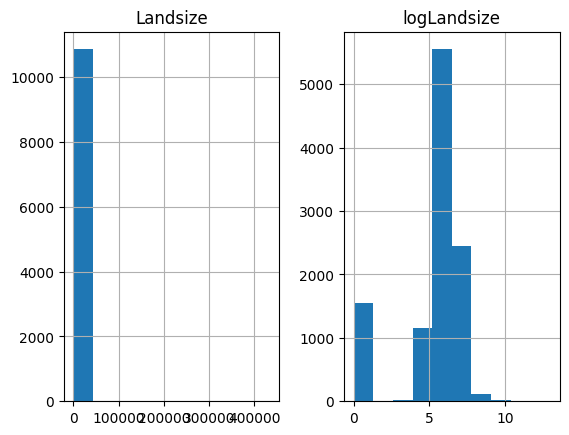

In [35]:
%matplotlib inline
train_X_logGains[['Landsize', 'logLandsize']].hist();

## Summary

Data rescaling is an important part of data preparation before applying machine learning algorithms. However, it is hard to know whether normalization or standardization of the data will improve the performance of a predictive model in advance. 

A good tip for a practical application is to create rescaled copies of your dataset and evaluate them against each other. This process can quickly show which rescaling method will improve your selected models in the problem at hand. Note that you could (and should) combine these techniques to train powerful models and apply them in real-world problems.

## Exercise 3
We can train our model using the different datasets and feature engineering techniques to evaluate their impact on the model performance. 
Print the score for the different methods we just introduced and compare them.

In [36]:
# code here

## Encoding Categorical Variables

Until now we only used numerical features for our models. However, valuable information is often encoded in categorical variables (e.g., gender, city, job).

If we simply __plug these categorial variables__ into machine learning models we will get an __error__. Hence, we need to find an appropriate preprocessing to capture the information hidden in categorical variables.

The easiest approach to deal with categorical variables is to __drop__ them from the dataset (that is what we have done before). However, this approach will only produce satisfying results if the dropped columns __did not contain useful information__.

### Label Encoding

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/label.png" style="width:60%; float:left;" />



One common approach to handle categorical variables is called label encoding. Here, we assign __each unique value to a different integer (e.g., bad = 0, neutral = 1, good = 2)__.

This assumption makes sense in this example, because there is an indisputable __ranking__ to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect label encoding to work well with ordinal variables.

For simplicity, we will drop columns with missing values for the following evaluation.

In [37]:
# Load dataset
data = pd.read_csv(melbourne_file_path)

# Drop NA
data.dropna(axis=0, inplace=True)

# Separate target from predictors
y = data['Price']
X = data.drop(['Price'], axis=1)

# Train-test split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

As we do not want to use all categorical variables we focus on those with a __limited number of categories__:

In [38]:
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and
                        X_train_full[cname].dtype == "object"]

print(low_cardinality_cols)

['Type', 'Method', 'Regionname']


...and combine them with the numerical variables:

In [39]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep only selected columns
cols_to_keep = low_cardinality_cols + numerical_cols
X_train = X_train_full[cols_to_keep].copy()
X_valid = X_valid_full[cols_to_keep].copy()

X_train.head()

,Type,Method,Regionname,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
6584,u,VB,Southern Metropolitan,6584,2,5.1,3181.0,2.0,1.0,1.0,0.0,71.0,1970.0,-37.85550,145.00180,4380.0
11369,h,S,South-Eastern Metropolitan,11369,3,38.0,3199.0,3.0,1.0,4.0,578.0,123.0,1984.0,-38.13743,145.16702,17055.0
11942,h,S,South-Eastern Metropolitan,11942,5,27.0,3196.0,5.0,5.0,4.0,570.0,243.0,1990.0,-38.03335,145.13212,2076.0
5830,u,VB,Southern Metropolitan,5830,1,6.1,3182.0,1.0,1.0,1.0,0.0,52.0,2012.0,-37.86760,144.99010,13240.0
1717,u,VB,Southern Metropolitan,1717,2,11.4,3163.0,2.0,1.0,1.0,0.0,70.0,1970.0,-37.90320,145.05550,7822.0


We can now perform label encoding on our new dataset using the functions provided by Scikit-learn. Subsequently, we can evaluate our approach by using our score_dataset utility function.

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
# Make a copy to protect original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder
label_encoder = LabelEncoder()
for col in low_cardinality_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

label_X_train.head()

,Type,Method,Regionname,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
6584,2,4,5,6584,2,5.1,3181.0,2.0,1.0,1.0,0.0,71.0,1970.0,-37.85550,145.00180,4380.0
11369,0,1,4,11369,3,38.0,3199.0,3.0,1.0,4.0,578.0,123.0,1984.0,-38.13743,145.16702,17055.0
11942,0,1,4,11942,5,27.0,3196.0,5.0,5.0,4.0,570.0,243.0,1990.0,-38.03335,145.13212,2076.0
5830,2,4,5,5830,1,6.1,3182.0,1.0,1.0,1.0,0.0,52.0,2012.0,-37.86760,144.99010,13240.0
1717,2,4,5,1717,2,11.4,3163.0,2.0,1.0,1.0,0.0,70.0,1970.0,-37.90320,145.05550,7822.0


In [42]:
# Evaluate performance
mae_label_encoding = score_dataset(label_X_train, label_X_valid, y_train, y_valid)
print("MAE using Label Encoding: {}".format(mae_label_encoding))

MAE using Label Encoding: 181651.9586532258


This result is considerably better than the model that relied only on numerical variables without imputation (MAE 191.669 USD).

### One-hot Encoding

<img src="https://raw.githubusercontent.com/GuntherGust/tds2_data/main/images/03/onehot.png" style="width:70%; float:left;" />



One-hot encoding creates new binary columns indicating the presence (or absence) of each possible value in the original data.

In contrast to label encoding, one-hot encoding does __not assume an ordering__ of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data. We refer to categorical variables without an intrinsic ranking as __nominal variables__.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally __won't use__ it for variables taking on __many__ (e.g. more than 15) __different values__).

Again, we can use Scikit-learn functions to implement one-hot encodings:

In [43]:
from sklearn.preprocessing import OneHotEncoder

Let's first look at the original values of the categorial variables before their transformation:

In [44]:
X_train[low_cardinality_cols].describe()

,Type,Method,Regionname
count,4956,4956,4956
unique,3,5,8
top,h,S,Southern Metropolitan
freq,3281,3161,1724


In [45]:
# Apply one-hot encoder to each column with categorical data
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot_cols_train = pd.DataFrame(one_hot_encoder.fit_transform(X_train[low_cardinality_cols]))
one_hot_cols_valid = pd.DataFrame(one_hot_encoder.transform(X_valid[low_cardinality_cols]))

# Repair index
one_hot_cols_train.index = X_train.index
one_hot_cols_valid.index = X_valid.index

Let's look at the result of the one-hot encoding:

In [46]:
one_hot_cols_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
6584,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11369,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11942,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5830,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1717,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Let's train the model:

In [47]:
# Remove categorical columns and replace with one-hot encoding
num_X_train = X_train.drop(low_cardinality_cols, axis=1)
num_X_valid = X_valid.drop(low_cardinality_cols, axis=1)
one_hot_X_train = pd.concat([num_X_train, one_hot_cols_train], axis=1)
one_hot_X_valid = pd.concat([num_X_valid, one_hot_cols_valid], axis=1)

print(one_hot_X_train.head())
# Evaluate performance
one_hot_encoding = score_dataset(one_hot_X_train.to_numpy(), one_hot_X_valid.to_numpy(), y_train, y_valid)
print("MAE using One-hot Encoding: {}".format(one_hot_encoding))

       Unnamed: 0  Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  \
6584         6584      2       5.1    3181.0       2.0       1.0  1.0   
11369       11369      3      38.0    3199.0       3.0       1.0  4.0   
11942       11942      5      27.0    3196.0       5.0       5.0  4.0   
5830         5830      1       6.1    3182.0       1.0       1.0  1.0   
1717         1717      2      11.4    3163.0       2.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  ...    6    7    8    9   10   11  \
6584        0.0          71.0     1970.0  ...  0.0  1.0  0.0  0.0  0.0  0.0   
11369     578.0         123.0     1984.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
11942     570.0         243.0     1990.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
5830        0.0          52.0     2012.0  ...  0.0  1.0  0.0  0.0  0.0  0.0   
1717        0.0          70.0     1970.0  ...  0.0  1.0  0.0  0.0  0.0  0.0   

        12   13   14   15  
6584   0.0  1.0  0.0  0.0  
11369  1.0  0.0  0.0  0.0  
11

This is a small improvement in comparison to the label encoded data (MAE 181.607 USD).

## Exercise 4
Use standardized numeric features like in the previous section and combine it with OneHot Encoding and Label Encoding for training the model.

The final results should have two cases: 

- One-hot encoded categorical + standardized numeric
- Label encoded categorical + standardized numeric

For each of the considered categorical columns, does it make more sense to use label encoding or one-hot encoding from a data perspective?

In [48]:
# code here

## Creating Model Pipelines

Up to now, we learned how to prepare our datasets, train, tune, and evaluate powerful models. However, we wrote lots of code and functions to perform all the required tasks. Scikit-learn pipelines are a simple way to keep our data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so we can use the whole bundle as if it were a single step.

Using pipelines provides multiple benefits:
* Cleaner Code
* Fewer Bugs
* Easier to Productionize
* More Options for Model Validation

We will build a pipeline using all numerical variables as well as the low cardinatlity categorical variables

In [49]:
# Load dataset
data = pd.read_csv(melbourne_file_path)

# Separate target from predictors
y = data['Price']
X = data[cols_to_keep]

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)
X_train.head()

,Type,Method,Regionname,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
12167,u,S,Southern Metropolitan,12167,1,5.0,3182.0,1.0,1.0,1.0,0.0,NaN,1940.0,-37.85984,144.9867,13240.0
6524,h,SA,Western Metropolitan,6524,2,8.0,3016.0,2.0,2.0,1.0,193.0,NaN,NaN,-37.85800,144.9005,6380.0
8413,h,S,Western Metropolitan,8413,3,12.6,3020.0,3.0,1.0,1.0,555.0,NaN,NaN,-37.79880,144.8220,3755.0
2919,u,SP,Northern Metropolitan,2919,3,13.0,3046.0,3.0,1.0,1.0,265.0,NaN,1995.0,-37.70830,144.9158,8870.0
6043,h,S,Western Metropolitan,6043,3,13.3,3020.0,3.0,1.0,2.0,673.0,673.0,1970.0,-37.76230,144.8272,4217.0


Writing a pipeline in Scikit-learn can be broken down into 3 steps:
1. Define preprocessing steps
2. Define the model
3. Create and evaluate the pipeline

### Define Preprocessing steps

We use the ``ColumnTransformer`` class to bundle together different preprocessing steps. To this end, we will impute missing values in the numerical columns and impute missing values and use one-hot encoding in the categorical columns.

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [51]:
# Preprocessing numerical columns
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle both preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, low_cardinality_cols)
])

### Define the Model
Next, we define a random forest model.

In [52]:
model = RandomForestRegressor(n_estimators=100, random_state=1)

### Create and Evaluate the Pipeline

Finally, we use the ``Pipeline`` class to define a pipeline that bundles the preprocessing and modeling steps.

In [53]:
# Bundle preprocessing and modeling code in a pipeline
complete_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Preprocess the raw training data and fit the model
complete_pipeline.fit(X_train, y_train)

# Preprocess the raw validation data and make predictions
preds = complete_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print("MAE using the complete pipeline: {}".format(score))

MAE using the complete pipeline: 160307.03832842415


 There are a few important things to notice:

* With the pipeline, we preprocess the training data and fit the model in a __single line of code__. (In contrast, without a pipeline, we have to do imputation, one-hot encoding, and model training in separate steps. This becomes especially messy if we have to deal with both numerical and categorical variables!)
* With the pipeline, we supply the __unprocessed features in X_valid to the predict()__ command, and the pipeline __automatically preprocesses__ the features before generating predictions. (However, without a pipeline, we have to remember to preprocess the validation data before making predictions.)

# Exercise 5

Extend the pipeline by including the normalization step for the numerical features.

In [54]:
# code here

# Mentimeter

# Descriptive Models

Descriptive models in machine learning are designed to understand and summarize patterns or structures within a dataset. Unlike predictive models, which focus on forecasting future outcomes or labels, descriptive models prioritize providing insights and identifying hidden relationships in the data. These models are especially valuable in exploratory data analysis (EDA), where the primary objective is to gain a deeper understanding of the data's characteristics before applying predictive methods.

## K-means Clustering

K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.

For a deeper understanding of how KNN works, please watch [this video](https://www.youtube.com/watch?v=4b5d3muPQmA).

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/kmeans.png" style="width:80%" />

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/vhaus63/ids_data/main/Mall_Customers.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [56]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [57]:
from lets_plot import *
LetsPlot.setup_html()

plt = (
    ggplot(X, aes(x='Annual Income (k$)', y='Spending Score (1-100)'))
    + geom_point()
    + ggsize(700, 400)
    + labs(
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        title='Scatter Plot of Annual Income vs. Spending Score'
    )
    + theme_minimal()
)
plt

Now we can fit the model. We choose 5 clusters for the beginning, based on our visual inspection of the dataset and its distribution.

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(X)
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [59]:
clusters_df = pd.concat([X, pd.Series(kmeans.labels_, name='Cluster')], axis=1)

# Scatter plot for clusters
p = ggplot(clusters_df) + \
    geom_point(aes(x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster')) + \
    scale_color_discrete(name='Cluster') + \
    labs(x='Annual Income (k$)', y='Spending Score (1-100)', color='Cluster')

p


WCSS, also known as inertia, measures the sum of squared distances between each data point and the centroid of its assigned cluster. The centroid is the mean position of all the points in the cluster.
It provides a measure of the costs of the k means model and can help to identify the right choice of k.

In [60]:
kmeans.inertia_

44448.45544793371

### Parameters to tune the model
1. k - the amount of clusters:

In [81]:
def elbow_method(X, max_k = 10):
    costs = []
    for k in range(2, max_k):
        model = KMeans(n_clusters=k, random_state=0, n_init="auto")
        model.fit(X)
        costs.append(model.inertia_)

    costs_df = pd.DataFrame({
        'K': range(2, max_k),  # Cluster counts (k)
        'Cost': costs  # The corresponding cost (inertia)
    })
    
    # Plotting the elbow curve
    p = (ggplot(costs_df, aes(x='K', y='Cost'))
        + geom_line()
        + geom_point()
        + labs(x='Number of Clusters (k)', y='Cost (Inertia)'))
    return p

In [82]:
elbow_method(X)

The elbow method should be utilized with care since it is both subjective and unreliable. In many practical applications, the choice of an "elbow" is highly ambiguous as the plot does not contain a sharp elbow. Because the two axes (the number of clusters and the remaining variance) have no semantic relationship, the plot is sensitive to the parameter range.

2. The distance measure

Sklearns' `kMeans` does not natively support the use of other distance metrices than the euclidean distance. To demonstrate the effect of changing this measure, we will use the `PyClustering` module.

In [63]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.utils import distance_metric, type_metric

In [80]:
X_list = [[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0], [10, 2], [10, 4], [10, 0]]

metrics = [
    ('Squared Euclidean', distance_metric(type_metric.EUCLIDEAN_SQUARE)),
    ('Chi Square', distance_metric(type_metric.CHI_SQUARE)),
    ('Manhattan', distance_metric(type_metric.MANHATTAN))
]

for metric_name, metric in metrics:
    print(f"Clustering with {metric_name} Distance:")

    initial_centers = random_center_initializer(X_list, 5, random_state=0).initialize()

    kmeans_instance = kmeans(X_list, initial_centers=initial_centers, metric=metric)
    kmeans_instance.process()
    
    centers = kmeans_instance.get_centers()
    clusters = kmeans_instance.get_clusters()
    
    print(f"  Cluster Centers: {centers}")
    print(f"  Clusters: {clusters}\n")

    cluster_data = []
    for cluster_idx, cluster in enumerate(clusters):
        for point_idx in cluster:
            x, y = X_list[point_idx]
            cluster_data.append({'x': x, 'y': y, 'label': cluster_idx})
    center_data = [{'x': center[0], 'y': center[1], 'label': f'C{idx}'} for idx, center in enumerate(centers)]
    
    # Convert to dataframes for plotting
    cluster_df = pd.DataFrame(cluster_data)
    center_df = pd.DataFrame(center_data)
    
    # Plot clusters and centers
    plot = (ggplot(cluster_df, aes('x', 'y', color='label'))
            + geom_point(size=4)
            + scale_color_discrete(name='Cluster')
            + ggtitle(f'Clusters using {metric_name} Distance')
            + theme_minimal()
           )
    display(plot)

Clustering with Squared Euclidean Distance:
  Cluster Centers: [[10.0, 3.0], [2.0, 0.6666666666666666], [1.0, 4.0], [4.0, 3.0], [10.0, 0.0]]
  Clusters: [[6, 7], [0, 2, 5], [1], [3, 4], [8]]



Clustering with Chi Square Distance:
  Cluster Centers: [[10.0, 3.0], [1.0, 1.0], [1.0, 4.0], [4.0, 3.0], [7.0, 0.0]]
  Clusters: [[6, 7], [0, 2], [1], [3, 4], [5, 8]]



Clustering with Manhattan Distance:
  Cluster Centers: [[10.0, 3.0], [1.0, 1.0], [1.0, 4.0], [4.0, 2.0], [10.0, 0.0]]
  Clusters: [[6, 7], [0, 2], [1], [3, 4, 5], [8]]



Choosing the right distance metric is an important step in using clustering algorithms like KMeans. The choice depends on the type of data you're working with (continuous, categorical, or binary), its inherent structure and relationships within your data and the specific requirements of your problem.

## Descriptive Regression model
Regression models estimate the relationship between an outcome (\(y\)) and input variables (\(x\)), represented as the conditional distribution \(p(y \mid x)\). While these models are often used for prediction, they also play a crucial **descriptive role** by summarizing and explaining patterns in data.
1. **Individual-Level Insights**: Regression provides predictions for \(y\) based on an individual's specific characteristics (\(x\)).
2. **Population-Level Insights**: Regression can be combined with external data about the distribution of \(x\) to make broader inferences. This approach, known as **poststratification**, estimates outcomes for subgroups in a population and aggregates them to describe overall trends.

**Example: Voting Behavior**
- **Objective**: Study voting likelihood based on demographics such as age, income, and education.
- **Insights**: The model describes how the likelihood of voting changes with these variables.
- **Application**: By combining the model with demographic data for a region, it can estimate overall voter turnout by aggregating predictions for different subgroups.


### Metrics for Evaluating Regression Models

While predictive linear regression focuses on forecasting outcomes by finding a model that minimizes prediction errors (often evaluated using metrics like Mean Squared Error (MSE)), for descriptive models there exist various other evaluation metrics that measure the goodness-of-fit and interpretability of the regression model:

#### 1. R-squared (R²): To Assess Model Fit
R² represents the proportion of the variance in the dependent variable that is explained by the independent variables:

$R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}}$, where:

  - $SS_{\text{residual}}$ is the sum of squared residuals.
  - $SS_{\text{total}}$ is the total sum of squares (variation in the dependent variable).
  
**Interpretation**: 

Higher R² values indicate that the model explains a large portion of the variance.

**Limitations**:

R² alone doesn't indicate model quality—it's possible to have a high R² but a poor model if the assumptions of regression aren't met.

#### 2. Adjusted R-squared: To Account for Model Complexity
The Adjusted R² adjusts R² for the number of predictors in the model, preventing overestimation of explanatory power as more variables are added.

**Formula**:

$\text{Adjusted } R^2 = 1 - \left(1 - R^2\right)\frac{n - 1}{n - p - 1}$, where:

  - $n$ is the number of data points.
  - $p$ is the number of predictors.

**Interpretation**:

A higher adjusted R² indicates that the predictors are explaining more of the variance in the dependent variable, adjusted for the number of predictors.

#### 3. F-statistic: To Check the Overall Significance of the Model
The F-statistic tests the null hypothesis that all regression coefficients are equal to zero, indicating no relationship between the independent variables and the dependent variable:

$F = \frac{(\text{Explained Variance}) / p}{(\text{Residual Variance}) / (n - p - 1)}$, where:

  - $p$ is the number of predictors.
  - $n$ is the number of observations.

**Interpretation**: 

A _significant F-statistic_ (p-value < 0.05) indicates that at least one of the independent variables has a statistically significant relationship with the dependent variable.

#### 4. Coefficients & p-values: To Understand the Magnitude and Significance of Individual Predictors
**Coefficients**: Represent the change in the dependent variable for a one-unit change in the predictor variable, assuming all other variables are held constant: A large coefficient indicates a strong influence of the predictor on the dependent variable.

**p-values**: Test the null hypothesis that the coefficient is equal to zero (no effect). A p-value less than 0.05 suggests that the predictor is statistically significant.
  
#### 5. Residual Analysis: To Ensure the Assumptions of Regression Are Met
**Residuals** are the differences between observed and predicted values. Analyzing them helps ensure that the assumptions of regression are satisfied.
  - **Linearity**: Check if the relationship between predictors and the dependent variable is linear.
  - **Homoscedasticity**: Residuals should have constant variance across all levels of the independent variables (no funneling effect).
  - **Independence**: Residuals should not be correlated with each other (i.e., no autocorrelation).
- **Tools**:
  - **Residual plots**: For checking linearity and homoscedasticity.
  - **Q-Q plots**: To assess the normality of residuals.

#### 6. AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion): For Model Comparison
**AIC**: Measures the trade-off between the goodness of fit and the complexity of the model (penalizing for more predictors).

$\text{AIC} = 2k - 2 \ln(L)$, where:

  - $k$ is the number of parameters (predictors).
  - $L$ is the likelihood of the model.

**Interpretation**:

Lower AIC values indicate better models. AIC helps to compare models with different numbers of predictors.
  
**BIC**: Similar to AIC, but applies a stronger penalty for adding predictors, particularly when the sample size is large.

$\text{BIC} = \ln(n)k - 2 \ln(L)$, where:
    - $n$ is the number of data points.
    - $k$ is the number of predictors.
    - $L$ is the likelihood of the model.

**Interpretation**:

Like AIC, a lower BIC is better, but BIC favors simpler models compared to AIC, especially in large datasets.  These criteria help assess how well the model explains the data while accounting for the number of predictors, avoiding unnecessary complexity.

#### Summary:
- **R² and Adjusted R²**: Used to assess how well the model fits the data and how much variance is explained.
- **F-statistic**: Tests if at least one of the predictors is significant.
- **Coefficients & p-values**: Helps interpret the magnitude and statistical significance of individual predictors.
- **Residual Analysis**: Ensures the assumptions of regression (linearity, homoscedasticity, independence) are met.
- **AIC/BIC**: Used for model comparison, penalizing for overfitting.

These metrics provide a thorough understanding of how well a regression model fits the data, explains relationships, and ensures the validity of the model's assumptions.


In [ ]:
# code example here

# include exercise on some metrices

## PCA: 

Apply PCA on a high-dimensional dataset and show how it simplifies data visualization.

## Association Rule Mining: 

Use a small transactional dataset to find simple association rules (e.g., with the mlxtend library).

<img src="https://raw.githubusercontent.com/vhaus63/ids_data/main/ao_modeling.png" style="width:80%" />

## Wrapping up

In this lecture we learned how to build powerful machine learning models leveraging numerical as well as categorical variables. Additionally, we learned about model pipelines which are helpful for creating reproducible and understandable code.

To keep improving, view the [scikit-learn documentation](https://scikit-learn.org/stable/) and keep working on your own projects!